# Transformations

1. Translation
2. Rotation
3. Scaling
4. Projective

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [13]:
def draw_quadrangle(X, Y, color = 'b', limX = [-50, 50], limY = [-50, 50]):
    '''
    To draw the object
    (X, Y) are the x-axis coordinates and y-axis coordinates of the picture's pixels
    limX = [lowerbound, upperbound]: the limitation of x axis
    limY = [lowerbound, upperbound]: the limitation of y axis
    '''
    plt.scatter(X,Y, color = color)
    plt.xlim(limX)
    plt.ylim(limY)

In [14]:
def transform(X, Y, T = np.eye(3), p = False):
    '''
    The transformation demonstration
    Input:
    - (X, Y) are the positions of pixels in the image need to be transformed
    - T is the transformation matrix
    - p = False is the demonstration mode, otherwise the pixel mode
    Attention: pixels' positions are positive integers only.
    Lecturers can select pixel mode to illsutrate the effect of pixels' position

    Output:
    homogeneous_coordinates: created from inhomogeneous coordinates
    (new_X, new_Y) are the transformed coordinates
    '''
    # print(X)
    row_ones = np.ones(len(X))
    # print(row_ones)
    homogeneous_coordinates = np.concatenate(([X], [Y], [row_ones]), axis = 0)
    # print(homogeneous_coordinates.shape)
    # print(homogeneous_coordinates)
    # print("transformation matrix = \n", T)
    # print(homogeneous_coordinates[:,0])
    new_coordinates = T @ homogeneous_coordinates
    # print(new_coordinates[:,0])
    new_X = new_coordinates[0, :]/new_coordinates[2, :]
    # print("new X = ", new_X)
    new_Y = new_coordinates[1, :]/new_coordinates[2, :]
    # print(new_coordinates[2, :])
    # print(new_X/new_coordinates[2, :])
    if(p):
        return new_X.astype('int32'), new_Y.astype('int32')
    else:
        return new_X, new_Y



## Initial picture

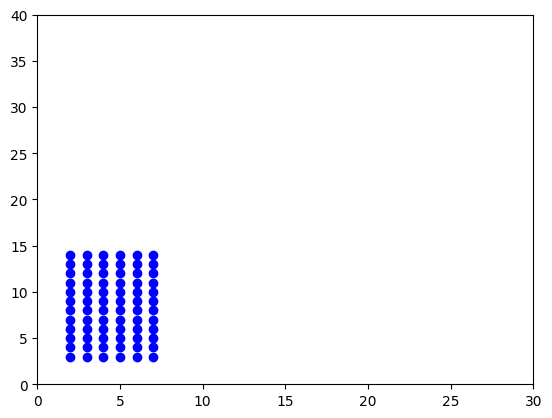

In [15]:
f1, f2 = np.meshgrid(np.arange(2,8), np.arange(3,15))
# print(f1, f2)
X = f1.flatten()
Y = f2.flatten()
draw_quadrangle(X, Y, limX = [0, 30], limY = [0, 40])

## 1. Translation transformation

In [16]:
T = np.array([[1, 0, 15], [0, 1, 20], [0, 0, 1]])
newX, newY = transform(X, Y, T, p = False)

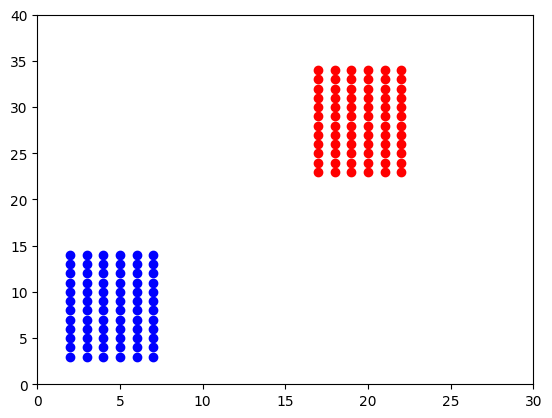

In [17]:
draw_quadrangle(X, Y, 'b')
draw_quadrangle(newX, newY, 'r', [0, 30], [0, 40])

## 2. Rotation transformation




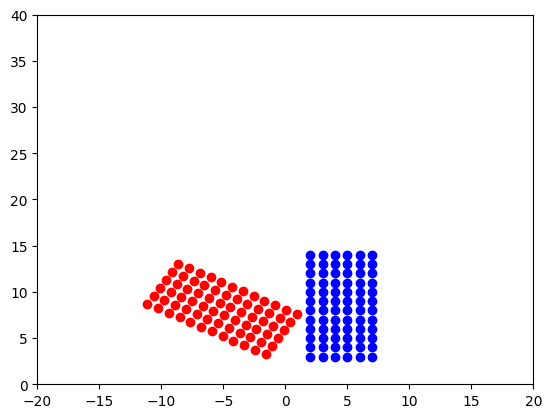

In [18]:
'''
Lecturers can change different theta_deg to see the results
'''
theta_deg = 60 # in degree
theta = theta_deg * np.pi / 180 # in radian
# print(np.sin(theta))
T = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]])
newX, newY = transform(X, Y, T, p = False)
draw_quadrangle(X, Y, 'b')
draw_quadrangle(newX, newY, 'r', [-20, 20], [0, 40])

## 3. Scaling transformation

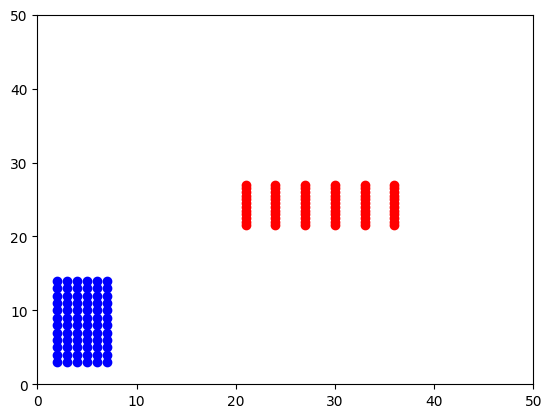

In [19]:
# scale x: 3; scale y: 0.5, translate  x: 15; translate y: 20
T = np.array([[3, 0, 15], [0, 0.5, 20], [0, 0, 1]])
newX, newY = transform(X, Y, T, p = False)
draw_quadrangle(X, Y, 'b')
draw_quadrangle(newX, newY, 'r', [0, 50], [0, 50])

## 4. Projective transformation

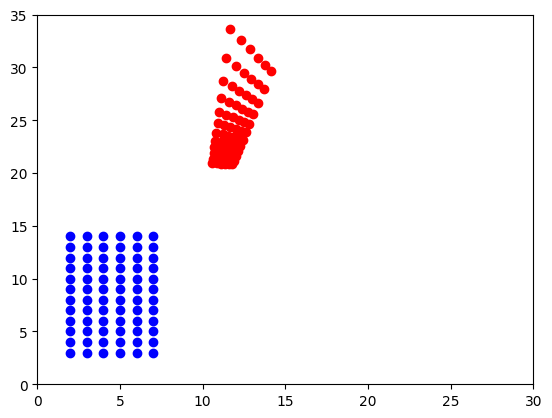

In [20]:
T = np.array([[5, 5, 10], [5, 7, 70], [0.25, 0.5, 1]])
newX, newY = transform(X, Y, T, p = False)
# print(newX)
# print(newY)
draw_quadrangle(X, Y, 'b')
draw_quadrangle(newX, newY, 'r', [0, 30], [0, 35])